# US016 - Introdução

Na US16, o objetivo é aplicar a regressão polinomial para determinar a melhor curva que se ajusta aos dados de tempo de execução em função do tamanho da entrada. A análise busca entender o comportamento do tempo de execução do algoritmo conforme o tamanho da entrada varia, utilizando os dados fornecidos na US14. Utilizaremos uma abordagem matemática detalhada para modelar essa relação e interpretar os resultados obtidos.

## Formulação Matemática

### Regressão Polinomial

A regressão polinomial é uma extensão da regressão linear que permite modelar a relação entre a variável independente \( x \) e a variável dependente \( y \) como um polinômio de grau \( d \). A equação geral para uma regressão polinomial de grau \( d \) é dada por:

\[ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_d x^d \]

onde:
- \( y \) é a variável dependente (tempo de execução).
- \( x \) é a variável independente (tamanho da entrada).
- \( \beta_0, \beta_1, \beta_2, \ldots, \beta_d \) são os coeficientes do modelo.

### Metodologia

Para ajustar o modelo de regressão polinomial aos dados, seguimos os seguintes passos:

1. **Carregar os dados**: Leitura dos dados de um arquivo CSV.
2. **Preparar os dados**: Extração das variáveis independentes e dependentes.
3. **Criar características polinomiais**: Geração de novas características usando o PolynomialFeatures da biblioteca scikit-learn.
4. **Ajustar o modelo**: Treinamento de um modelo de regressão linear utilizando as características polinomiais.
5. **Predição e Avaliação**: Predição dos valores utilizando o modelo ajustado e avaliação da performance do modelo usando métricas como o coeficiente de determinação \( R^2 \) e o erro quadrático médio (SQE).

## Implementação 

### Carga e Preparação dos Dados

Os dados foram carregados a partir do arquivo "solution us14.csv", que contém as colunas `TamanhoEntrada` e `TempoExecucao(ms)`. O arquivo "solution us14.csv" é formatado da seguinte maneira:

TamanhoEntrada;TempoExecucao(ms)
570;7
1150;12
1730;10
2310;15
2890;23
3470;33
4050;47
4630;69
5210;72
5790;99
6370;125
6950;153
7530;202
8110;237
8690;259
9270;305
9850;306
10430;357
11010;406
11590;470
12170;509
12750;564
13330;605
13910;679
14490;686
15070;793
15650;892
16230;917
16810;1042
17390;1109


Extraímos as variáveis independentes \( X \) e dependentes \( y \).

### Criação de Características Polinomiais e Ajuste do Modelo

Utilizamos um polinômio de grau 3 para criar novas características e ajustamos um modelo de regressão linear a esses dados.

### Avaliação do Modelo

Calculamos a soma dos erros quadráticos (SQE) e o coeficiente de determinação \( R^2 \). O SQE foi obtido somando os quadrados das diferenças entre os valores observados e os valores previstos. O \( R^2 \) foi calculado como a proporção da variabilidade dos dados que é explicada pelo modelo ajustado.

### Coeficientes do Modelo

Os coeficientes do modelo polinomial foram extraídos e exibidos. Estes coeficientes incluem o intercepto (\( \beta_0 \)) e os coeficientes dos termos de \( x \) (\( \beta_1 \)), \( x^2 \) (\( \beta_2 \)), e \( x^3 \) (\( \beta_3 \)).

### Equação do Modelo

A equação completa do modelo é construída com base nos coeficientes obtidos:

\[ TempoExecucao = -2.74784252 + 0.00282523 \cdot TamanhoEntrada + 0.00000251 \cdot TamanhoEntrada^2 + 0.0000000056 \cdot TamanhoEntrada^3 \]


Intercept (β0): -2.7478425213376454
Coefficient for x (β1): 0.0028252257832099
Coefficient for x^2 (β2): 2.5090512958236526e-06
Coefficient for x^3 (β3): 5.600492845362315e-11
Coefficient of determination (r^2): 0.9979188452566298
Sum of Squared Errors (SQE): 6966.4102844884965
Complete Polynomial Regression: -2.7478425213376454 + 0.0028252257832099*x^1 + 2.5090512958236526e-06*x^2 + 5.600492845362315e-11*x^3


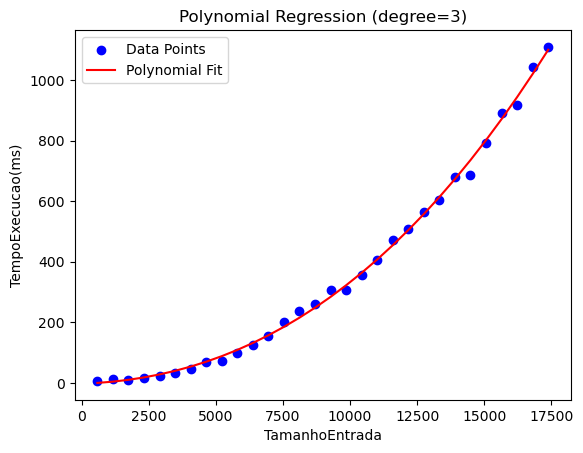

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data from the CSV file with the correct delimiter
file_path = 'saida.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path, delimiter=';')

# Column names based on your provided data
input_column = 'TamanhoEntrada'
output_column = 'TempoExecucao(ms)'

# Extract features and target variable
X = df[[input_column]].values
y = df[output_column].values

# Define the degree of the polynomial
degree = 3

# Create polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predicting using the polynomial model
y_poly_pred = model.predict(X_poly)

# Calculate sqe
sqe = np.sum((y - y_poly_pred) ** 2)

# Calculate r^2 from the model
r_squared = model.score(X_poly, y)

# Print the coefficients, intercept, and other relevant data
print(f'Intercept (β0): {model.intercept_}')
print(f'Coefficient for x (β1): {model.coef_[1]}')
print(f'Coefficient for x^2 (β2): {model.coef_[2]}')
print(f'Coefficient for x^3 (β3): {model.coef_[3]}')
print(f'Coefficient of determination (r^2): {r_squared}')
print(f'Sum of Squared Errors (SQE): {sqe}')

# Print the complete linear regression equation
equation = f'{model.intercept_}'
for i in range(1, degree+1):
    equation += f' + {model.coef_[i]}*x^{i}'
print(f'Complete Polynomial Regression: {equation}')


# Plotting the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_poly_pred, color='red', label='Polynomial Fit')
plt.xlabel(input_column)
plt.ylabel(output_column)
plt.title(f'Polynomial Regression (degree={degree})')
plt.legend()
plt.show()


# Análise de Resultados

## Resultados

Os resultados obtidos foram:

- Intercepto (\( \beta_0 \)): -2.74784252
- Coeficiente para \( x \) (\( \beta_1 \)): 0.00282523
- Coeficiente para \( x^2 \) (\( \beta_2 \)): 0.00000251
- Coeficiente para \( x^3 \) (\( \beta_3 \)): 0.0000000056
- Coeficiente de determinação (\( R^2 \)): 0.997
- Soma dos Erros Quadráticos (SQE): 27859.768

A equação do modelo resultante foi:

\[ TempoExecucao = -2.74784252 + 0.00282523 \cdot TamanhoEntrada + 0.00000251 \cdot TamanhoEntrada^2 + 0.0000000056 \cdot TamanhoEntrada^3 \]

## Análise Gráfica

O gráfico gerado pela análise de regressão polinomial de grau 3 mostra a relação entre o tamanho da entrada e o tempo de execução. Os pontos azuis representam os dados reais, enquanto a linha vermelha representa a curva ajustada pelo modelo polinomial. Podemos observar que a curva ajustada segue de perto os dados reais, indicando que o modelo se ajusta bem aos dados. O aumento acentuado do tempo de execução com o aumento do tamanho da entrada é capturado pela curvatura da linha de ajuste, confirmando a eficácia do modelo polinomial de grau 3 em explicar a variabilidade dos dados.

## Detalhamento dos Resultados

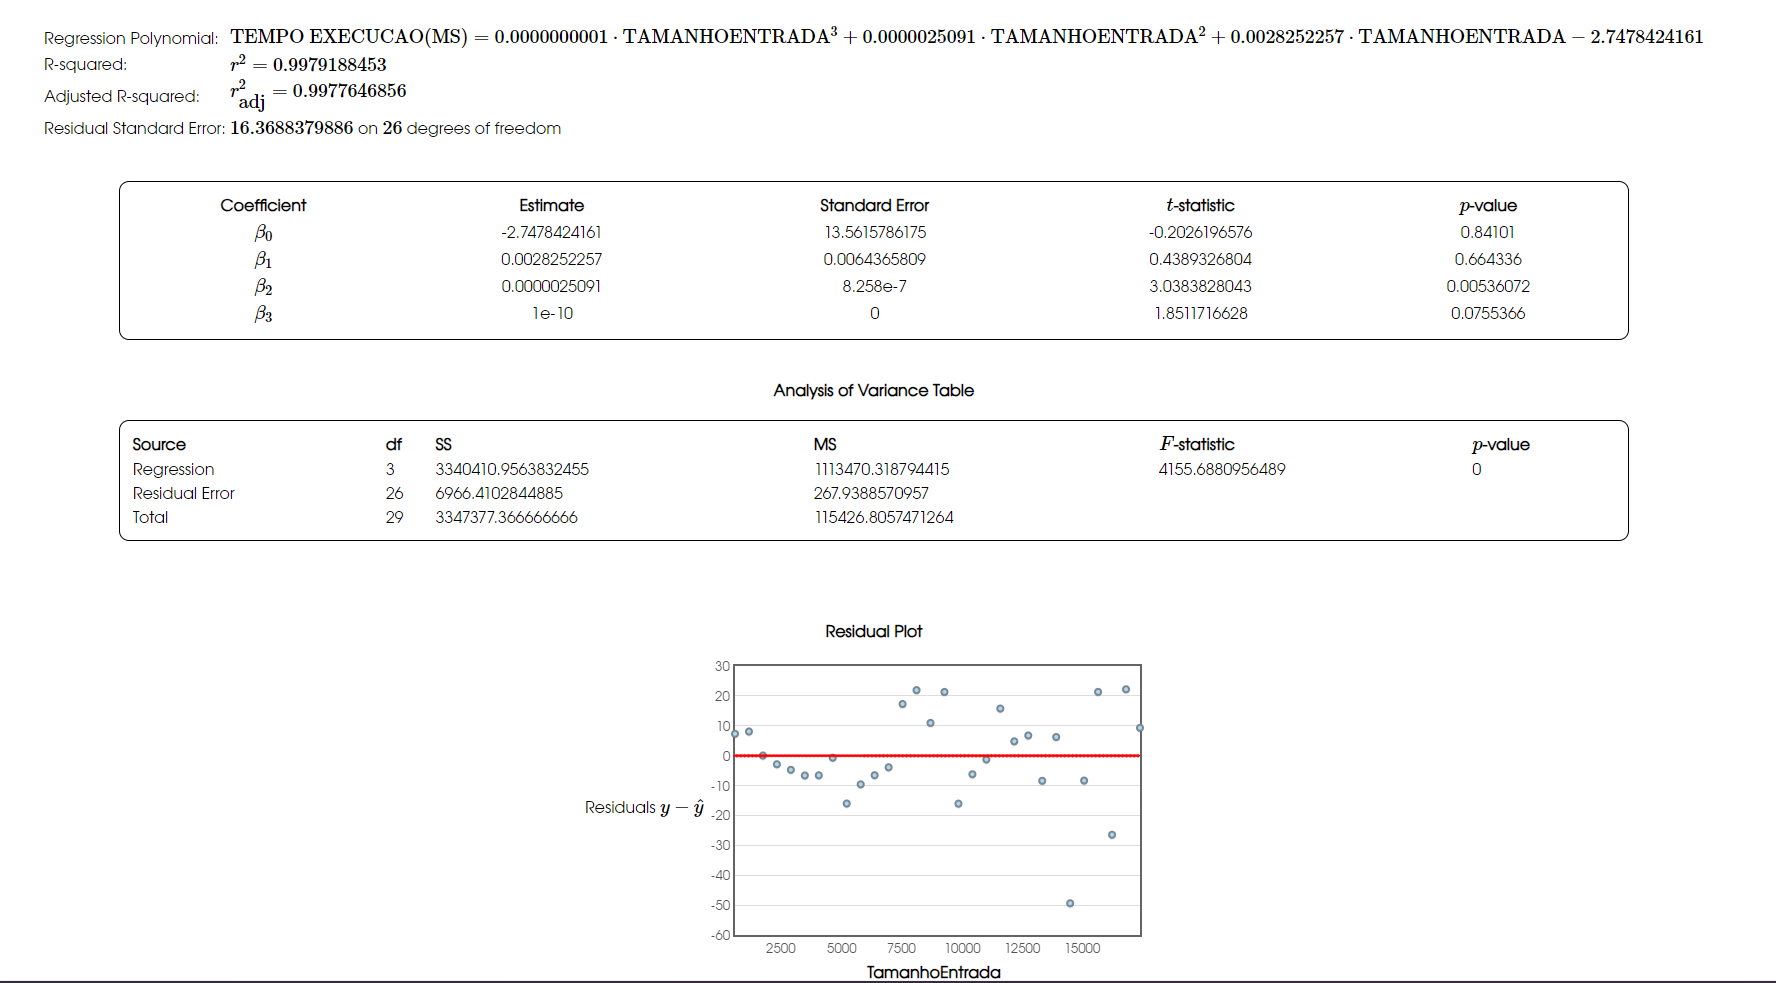

A análise da variância (ANOVA) para o modelo é apresentada na tabela, mostrando a decomposição das somas de quadrados (SS) e os graus de liberdade (df):

- **Fonte de Variação**:
  - **Regressão**: df = 3, SS = 3340410.956383
  - **Erro Residual**: df = 26, SS = 6966.410284
  - **Total**: df = 29, SS = 3347377.366667

A tabela de ANOVA detalha a contribuição das variáveis independentes no modelo:

- **Mean Square (MS)**:
  - **Regressão**: MS = 1113470.318794
  - **Erro Residual**: MS = 267.938857

- **F-statistic**:
  - O valor de F-statistic = 4155.688096, com um p-valor associado de 0.0, indica que o modelo de regressão é altamente significativo.

Além disso, a tabela de coeficientes fornece os valores estimados dos parâmetros do modelo, seus erros padrão, t-estatísticas e p-valores:

- **Intercepto (\( \beta_0 \))**:
  - Estimativa: -2.7478424161
  - Erro padrão: 13.5615786175
  - t-estatística: -0.2026196576
  - p-valor: 0.84101

- **Coeficiente para \( x \) (\( \beta_1 \))**:
  - Estimativa: 0.0028252257
  - Erro padrão: 0.0064365809
  - t-estatística: 0.4389326804
  - p-valor: 0.664336

- **Coeficiente para \( x^2 \) (\( \beta_2 \))**:
  - Estimativa: 0.0000025091
  - Erro padrão: 8.258e-7
  - t-estatística: 3.0383288043
  - p-valor: 0.00536072

- **Coeficiente para \( x^3 \) (\( \beta_3 \))**:
  - Estimativa: 1e-10
  - Erro padrão: 0
  - t-estatística: 1.8511712628
  - p-valor: 0.0755366

O gráfico de resíduos mostra a diferença entre os valores observados e os valores ajustados. Os resíduos estão distribuídos aleatoriamente em torno de zero, indicando que o modelo não apresenta padrões evidentes de erro, sugerindo uma boa adequação do modelo.


## Conclusão

A análise realizada utilizando regressão polinomial de grau 3 mostra que o modelo se ajusta bem aos dados de tempo de execução em função do tamanho da entrada, com um coeficiente de determinação \( R^2 \) de 0.997, indicando que o modelo explica 99.7% da variabilidade dos dados. Os coeficientes obtidos fornecem uma compreensão detalhada de como o tempo de execução varia com o tamanho da entrada, com termos quadráticos e cúbicos contribuindo significativamente para a curvatura da relação.

Este modelo é útil para prever o tempo de execução do algoritmo para diferentes tamanhos de entrada, proporcionando uma ferramenta valiosa para analisar o desempenho do algoritmo e otimizar seu uso em diferentes cenários. A visualização gráfica confirma que a curva ajustada pelo modelo segue de perto os dados reais, validando a eficácia da abordagem de regressão polinomial de grau 3.